<a href="https://colab.research.google.com/github/Meghana100301/CustomerRetention/blob/main/customerretention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**
One of the topmost banks in Europe wants to understand their customer data in-detail and trying to
extract the patterns causing for customer churn (i.e., bank is losing its existing customers). In order to
solve this problem, they have retrieved the customer data from the database which contains the
information of both churned and active customers. Develop a machine learning model that can predict
whether the given customer would churn in the near future or not. Data: “BankCustomerChurn.csv”,
variables are self-explanatory.




###Preprocessing of the Data



In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("BankCustomerChurn.csv")

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
ins=[]
for x in data.columns:
    if(data[x].nunique()<10):
         ins.append(x)
         print(x,data[x].nunique())
         print(data[x].unique())

Geography 3
['France' 'Spain' 'Germany']
Gender 2
['Female' 'Male']
NumOfProducts 4
[1 3 2 4]
HasCrCard 2
[1 0]
IsActiveMember 2
[1 0]
Exited 2
[1 0]


In [8]:
ins

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [9]:
for col in ['Geography', 'Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited','CustomerId']:
     data[col]=data[col].astype('category')#converting into categorical variable

In [10]:
data.dtypes

RowNumber             int64
CustomerId         category
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [11]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.0,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.0
unique,NaN,10000.0,2932,NaN,3,2,NaN,NaN,NaN,4.0,2.0,2.0,NaN,2.0
top,NaN,15815690.0,Smith,NaN,France,Male,NaN,NaN,NaN,1.0,1.0,1.0,NaN,0.0
freq,NaN,1.0,32,NaN,5014,5457,NaN,NaN,NaN,5084.0,7055.0,5151.0,NaN,7963.0
mean,5000.50000,NaN,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,NaN,NaN,NaN,100090.239881,NaN
std,2886.89568,NaN,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,NaN,NaN,NaN,57510.492818,NaN
min,1.00000,NaN,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,NaN,NaN,NaN,11.580000,NaN
25%,2500.75000,NaN,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,NaN,NaN,NaN,51002.110000,NaN
50%,5000.50000,NaN,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,NaN,NaN,NaN,100193.915000,NaN
75%,7500.25000,NaN,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,NaN,NaN,NaN,149388.247500,NaN


Removing the duplicates

In [12]:
data=data.drop_duplicates(keep='first')

In [13]:
data.shape

(10000, 14)

In [14]:
data.isna().sum()#checking for null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
x=data.copy()

In [16]:
x=x.drop(['Exited','RowNumber','CustomerId','Surname'],axis=1)#independent variables into x
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [17]:
x.shape

(10000, 10)

In [18]:
y=data[['Exited']]#target variable in y
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


Dummification of the Attributes

In [19]:
cs=['Geography', 'Gender','NumOfProducts','HasCrCard','IsActiveMember']
x=pd.get_dummies(x,columns=cs)

In [20]:
x

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,0,0,1,0,1,0,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,1,1,0,1,0,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,0,0,1,0,0,0,1,0,0,1,1,0
3,699,39,1,0.00,93826.63,1,0,0,1,0,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,1,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,96270.64,1,0,0,0,1,0,1,0,0,0,1,1,0
9996,516,35,10,57369.61,101699.77,1,0,0,0,1,1,0,0,0,0,1,0,1
9997,709,36,7,0.00,42085.58,1,0,0,1,0,1,0,0,0,1,0,0,1
9998,772,42,3,75075.31,92888.52,0,1,0,0,1,0,1,0,0,0,1,1,0


# **Model Building**


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)#splitting into train and split data

In [22]:
print(X_train.shape)
print("\n")
print(X_test.shape)
print("\n")
print(y_train.shape)
print("\n")
print(y_test.shape)

(6700, 18)


(3300, 18)


(6700, 1)


(3300, 1)


In [23]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_0', 'HasCrCard_1',
       'IsActiveMember_0', 'IsActiveMember_1'],
      dtype='object')

##Decision Tree with Depth 3


In [24]:
from sklearn.tree import DecisionTreeClassifier #using decision tree
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)  

In [25]:
dtc.fit(X_train,y_train)#fitting the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
preds_train=dtc.predict(X_train)
preds_test=dtc.predict(X_test)

In [27]:
preds_test[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0])

In [28]:
preds_train[0:50]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0])

Accuracy

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,preds_train)#checking the accuracy for train data

0.8405970149253731

In [30]:
accuracy_score(y_test,preds_test)#checking the accuracy for the test data

0.8518181818181818

Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,preds_train))

[[5083  223]
 [ 845  549]]


In [32]:
print(confusion_matrix(y_test,preds_test))

[[2550  107]
 [ 382  261]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      5306
           1       0.71      0.39      0.51      1394

    accuracy                           0.84      6700
   macro avg       0.78      0.68      0.71      6700
weighted avg       0.83      0.84      0.82      6700



In [34]:
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2657
           1       0.71      0.41      0.52       643

    accuracy                           0.85      3300
   macro avg       0.79      0.68      0.71      3300
weighted avg       0.84      0.85      0.84      3300



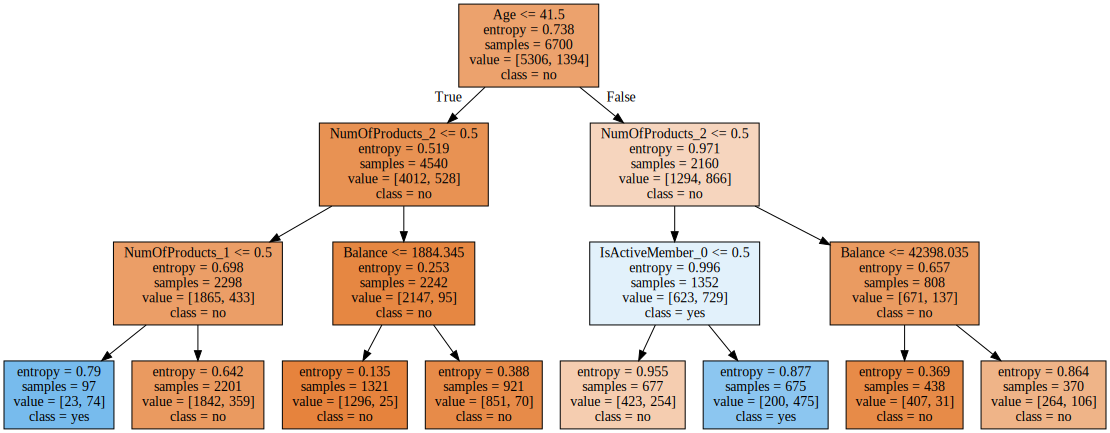

In [35]:
import graphviz
from  sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(dtc,out_file=None,
                                feature_names=X_train.columns,
                                class_names=["no","yes"],
                                filled=True))


##Decision Tree with depth 9

In [36]:
from sklearn.tree import DecisionTreeClassifier #using decision tree
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=9)

In [37]:
dtc.fit(X_train,y_train)#fitting the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
preds_train=dtc.predict(X_train)
preds_test=dtc.predict(X_test)

Accuracy

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,preds_train)#checking the accuracy for train data

0.8888059701492538

In [40]:
accuracy_score(y_test,preds_test)#checking the accuracy for the test data

0.8539393939393939

Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,preds_train))


[[5123  183]
 [ 562  832]]


In [42]:
print(confusion_matrix(y_test,preds_test))

[[2496  161]
 [ 321  322]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5306
           1       0.82      0.60      0.69      1394

    accuracy                           0.89      6700
   macro avg       0.86      0.78      0.81      6700
weighted avg       0.88      0.89      0.88      6700



In [44]:
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2657
           1       0.67      0.50      0.57       643

    accuracy                           0.85      3300
   macro avg       0.78      0.72      0.74      3300
weighted avg       0.84      0.85      0.85      3300



## Decision Tree of depth 6

In [45]:
from sklearn.tree import DecisionTreeClassifier #using decision tree
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [46]:
dtc.fit(X_train,y_train)#fitting the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
preds_train=dtc.predict(X_train)
preds_test=dtc.predict(X_test)

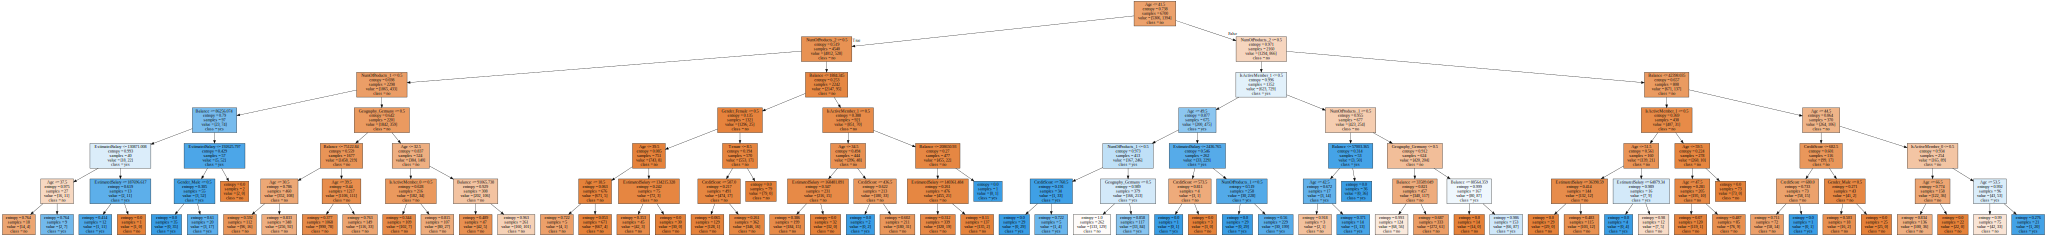

In [56]:
import graphviz
from  sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(dtc,out_file=None,
                                feature_names=X_train.columns,
                                class_names=["no","yes"],
                                filled=True))

Accuracy

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,preds_train)#checking the accuracy for train data

0.8579104477611941

In [49]:
accuracy_score(y_test,preds_test)#checking the accuracy for the test data

0.8636363636363636

Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,preds_train))


[[5168  138]
 [ 814  580]]


In [51]:
print(confusion_matrix(y_test,preds_test))

[[2575   82]
 [ 368  275]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      5306
           1       0.81      0.42      0.55      1394

    accuracy                           0.86      6700
   macro avg       0.84      0.70      0.73      6700
weighted avg       0.85      0.86      0.84      6700



In [53]:
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2657
           1       0.77      0.43      0.55       643

    accuracy                           0.86      3300
   macro avg       0.82      0.70      0.73      3300
weighted avg       0.85      0.86      0.85      3300



For depth 3:
train accuracy = 0.8435
Test accuracy=0.8475

For Depth 9:
train accuracy = 0.888625
Test accuracy=0.8475

For depth 6:
train accuracy = 0.860875
Test accuracy=0.8595


